**IMPORTING LIBRARIRES**

In [ ]:
import folium
from folium import plugins

# Step 1: Install necessary libraries
!pip install pandas numpy geemap folium

import pandas as pd
import numpy as np
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
!pip install folium


**IMPORTING NECESSARY APIs FOR MAP VISUALIZATION**

In [1]:
import pandas as pd
import folium
from folium.plugins import LocateControl
from google.colab import files
df = pd.read_csv('/content/drive/MyDrive/ForestFire/forest_fire_data.csv')
# Ensure no NaN values in latitude and longitude
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map centered on the average latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add Esri Satellite base layer (imagery only)
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Esri Satellite",
    name="Esri Satellite",
    control=True
).add_to(m)

# Add Esri labels as an overlay layer
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/Reference/World_Boundaries_and_Places/MapServer/tile/{z}/{y}/{x}",
    attr="Esri Labels",
    name="Labels",
    overlay=True,
    control=True
).add_to(m)

# Add OpenStreetMap base layer as an alternative
folium.TileLayer(
    tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    name='OpenStreetMap',
    attr='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
).add_to(m)

# Add location detection tool
LocateControl(auto_start=False).add_to(m)

# Plot fire locations based on FRP (Fire Radiative Power)
for index, row in df.iterrows():
    # Creating popup text with Area Spread
    popup_text = f"""
    <strong>Fire Details</strong><br>
    Latitude: {row['latitude']}<br>
    Longitude: {row['longitude']}<br>
    Bright TI4: {row['bright_ti4']}<br>
    Scan: {row['scan']}<br>
    Track: {row['track']}<br>
    Acquisition Date: {row['acq_date']}<br>
    Acquisition Time: {row['acq_time']}<br>
    Satellite: {row['satellite']}<br>
    Type: {row['type']}<br>
    Instrument: {row['instrument']}<br>
    Confidence: {row['confidence']}<br>
    Version: {row['version']}<br>
    Bright TI5: {row['bright_ti5']}<br>
    FRP: {row['frp']} MW<br>
    Day/Night: {row['daynight']}<br>
    Area Spread: {row['area_spread']} sq km<br>
    """

    if row['frp'] > 0:  # If fire occurred (frp > 0)
        # Adding a marker with the popup for fire with area spread info
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            icon=folium.Icon(color='red', icon='fire', prefix='fa'),  # Red fire icon
            popup=folium.Popup(popup_text, max_width=300)  # Detailed popup on click
        ).add_to(m)

        # Tooltip on hover to show basic info (e.g., Latitude, Longitude and Area Spread)
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            icon=folium.Icon(color='red', icon='fire', prefix='fa'),
            tooltip=f"Lat: {row['latitude']}, Lon: {row['longitude']}, Area Spread: {row['area_spread']} sq km"
        ).add_to(m)
    else:  # If no fire occurred (frp <= 0)
        # Marker for no fire with area spread info
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            icon=folium.Icon(color='green', icon='circle', prefix='fa'),  # Green circle for no fire
            popup=f"No Fire on {row['acq_date']} at {row['acq_time']} UTC<br>Area Spread: {row['area_spread']} sq km"
        ).add_to(m)

# Add LayerControl to toggle between base layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
map_file = 'forest_fire_map_with_area_spread_and_tooltips.html'
m.save(map_file)

# Download the map file to view it locally
files.download(map_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**LOADING DATASET**

In [2]:
import pandas as pd

# Path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/ForestFire/forest_fire_data.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,type,instrument,confidence,version,bright_ti5,frp,daynight,area_spread
0,18.08805,73.10101,301.18,36,4,01-01-2023,01:16:31,NOAA-20,Fire,VIIRS,85,2.2,308.97,93.77,Day,0.09377
1,21.87354,83.00069,315.47,53,34,01-01-2023,17:35:31,Suomi NPP,Controlled Burn,AVHRR,61,1.6,306.53,56.20,Day,0.05620
2,26.82857,95.32928,317.32,29,3,02-01-2023,21:29:31,NOAA-20,Controlled Burn,VIIRS,86,1.2,302.36,86.76,Night,0.08676
3,26.82312,95.32541,319.25,44,44,02-01-2023,17:33:31,NOAA-20,Controlled Burn,MODIS,92,1.6,306.34,73.07,Night,0.07307
4,16.02242,75.06239,309.20,12,98,02-01-2023,03:07:31,Aqua,Fire,VIIRS,73,1.7,312.69,54.84,Day,0.05484


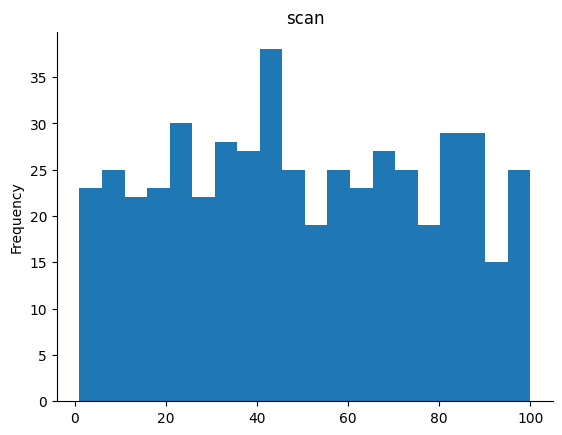

In [ ]:
# @title scan

from matplotlib import pyplot as plt
df['scan'].plot(kind='hist', bins=20, title='scan')
plt.gca().spines[['top', 'right',]].set_visible(False)

**SATELLITE IMAGES FEATURE EXTRACTED DATA DOWNLOADED FROM NASA VIIRS S-NPP SATELLITE**

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1DUaJUEXaHxWY9VBlpqfMJsfnhSAZUR6PMtSZOwVsbqo#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


**NORMALIZING FIRE INTENSITY PARAMETER**

In [ ]:
df['fire_area'] = df['frp'] / 100

**DEFINING CLASSIFIER FUNCTION**

In [ ]:
def classify_fire_intensity(frp):
    if frp > 200:
        return "Severe"
    elif frp > 100:
        return "Moderate"
    else:
        return "Low"

df['fire_intensity'] = df['frp'].apply(classify_fire_intensity)

**LOADING DATE,TIME AND AREA SPREAD**

In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'], format='%d-%m-%Y') # Specify the correct format for your date strings
first_fire_date = df['acq_date'].min()
df['days_since_first'] = (df['acq_date'] - first_fire_date).dt.days
df['area_spread'] = df['fire_area'] * df['days_since_first']

**PLOT OF FIRE AREA SPREAD OVER TIME**

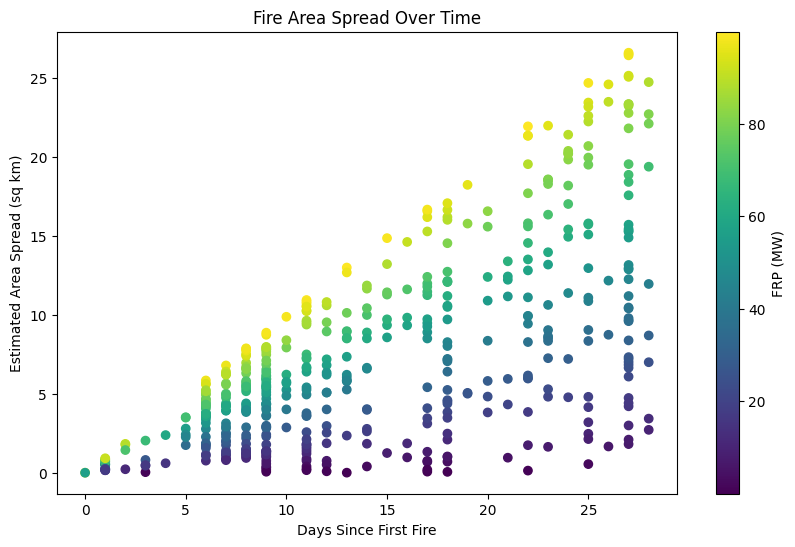

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['days_since_first'], df['area_spread'], c=df['frp'], cmap='viridis')
plt.colorbar(label='FRP (MW)')
plt.xlabel('Days Since First Fire')
plt.ylabel('Estimated Area Spread (sq km)')
plt.title('Fire Area Spread Over Time')
plt.show()


**DATASET COLUMNS**

In [3]:
df[['latitude', 'longitude', 'acq_date', 'acq_time', 'type', 'frp', 'confidence', 'area_spread']]

,latitude,longitude,acq_date,acq_time,type,frp,confidence,area_spread
0,18.08805,73.10101,01-01-2023,01:16:31,Fire,93.77,85,0.09377
1,21.87354,83.00069,01-01-2023,17:35:31,Controlled Burn,56.20,61,0.05620
2,26.82857,95.32928,02-01-2023,21:29:31,Controlled Burn,86.76,86,0.08676
3,26.82312,95.32541,02-01-2023,17:33:31,Controlled Burn,73.07,92,0.07307
4,16.02242,75.06239,02-01-2023,03:07:31,Fire,54.84,73,0.05484
...,...,...,...,...,...,...,...,...
494,15.11189,75.12759,29-01-2023,07:47:31,Wildfire,12.23,78,0.01223
495,17.65597,77.79056,29-01-2023,16:05:31,Fire,78.91,91,0.07891
496,19.00106,78.61109,29-01-2023,17:57:31,Wildfire,88.30,84,0.08830
497,19.16515,77.54504,29-01-2023,04:04:31,Controlled Burn,42.67,66,0.04267
